In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
sns.set(style="darkgrid")
plt.style.use("seaborn-pastel")

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

/tmp/ipykernel_5732/3559241571.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


In [2]:
data = pd.read_excel("Forbes Athlete List 2012-2019.xlsx")
data.head()

,Rank,Name,Pay,Salary/Winnings,Endorsements,Sport,Year
0,#1,Lionel Messi,$127 M,$92 M,$35 M,Soccer,2019
1,#2,Cristiano Ronaldo,$109 M,$65 M,$44 M,Soccer,2019
2,#3,Neymar,$105 M,$75 M,$30 M,Soccer,2019
3,#4,Canelo Alvarez,$94 M,$92 M,$2 M,Boxing,2019
4,#5,Roger Federer,$93.4 M,$7.4 M,$86 M,Tennis,2019


In [4]:
data['Rank'] = data['Rank'].apply(lambda x: int(x.split("#")[1]) if isinstance(x, str) else x)
data['Pay'] = data['Pay'].apply(lambda x: float(x.split(" ")[0].split("$")[1]))
data['Endorsements'] = data['Endorsements'].apply(lambda x: float(x.split(" ")[0].split("$")[1]))
data["Salary/Winnings"].replace("-", '$nan M', inplace=True)
data["Salary/Winnings"] = data["Salary/Winnings"].apply(lambda x: float(x.split(" ")[0].split("$")[1]))
data['Sport'].replace({"Soccer": "Football",
                       "Football": "American Football",
                       "Mixed Martial Arts": "MMA",
                       "Auto racing": "Racing",
                       "Auto Racing": "Racing",
                       "Basketbal": "Basketball",
                      }, inplace=True)

data.columns = ['Rank', 'Name', 'Pay', 'Salary_Winnings', 'Endorsements', 'Sport', 'Year']

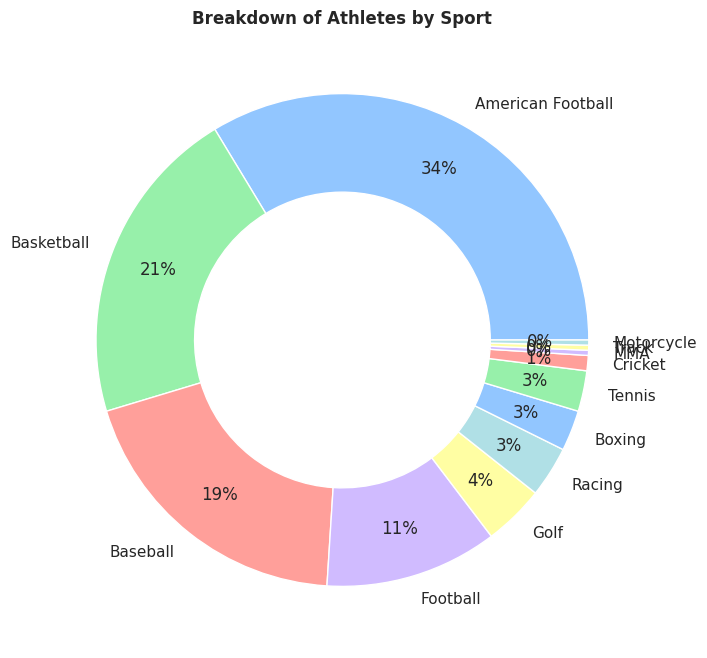

In [5]:
data.groupby("Name").first()["Sport"].value_counts().plot(kind="pie",autopct="%.0f%%",figsize=(8,8),wedgeprops=dict(width=0.4),pctdistance=0.8)
plt.ylabel(None)
plt.title("Breakdown of Athletes by Sport",fontweight="bold")
plt.show()

In [6]:
data.Year = pd.to_datetime(data.Year,format="%Y")

In [7]:
racing_bar_data = data.pivot_table(values="Pay",index="Year",columns="Name")

In [8]:
racing_bar_data.columns[racing_bar_data.isnull().sum() == 0]

Index(['Carmelo Anthony', 'Cristiano Ronaldo', 'Dwight Howard',
       'Justin Verlander', 'LeBron James', 'Lionel Messi', 'Phil Mickelson',
       'Rafael Nadal', 'Roger Federer', 'Tiger Woods'],
      dtype='object', name='Name')

In [9]:
racing_bar_filled = racing_bar_data.interpolate(method="linear").fillna(method="bfill")
racing_bar_filled = racing_bar_filled.cumsum()

In [10]:
racing_bar_filled = racing_bar_filled.resample("1D").interpolate(method="linear")[::7]

In [13]:
selected  = racing_bar_filled.iloc[-1,:].sort_values(ascending=False)[:20].index
data = racing_bar_filled[selected].round()

fig,ax = plt.subplots(figsize=(9.3,7))
fig.subplots_adjust(left=0.18)
no_of_frames = data.shape[0] #Number of frames

#initiate the barplot with the first rows of the dataframe
bars = sns.barplot(y=data.columns,x=data.iloc[0,:],orient="h",ax=ax)
ax.set_xlim(0,1500)
txts = [ax.text(0,i,0,va="center") for i in range(data.shape[1])]
title_txt = ax.text(650,-1,"Date: ",fontsize=12)
ax.set_xlabel("Pay (Millions USD)")
ax.set_ylabel(None)

def animate(i):
    #get i'th row of data 
    y = data.iloc[i,:]
    
    #update title of the barplot axis
    title_txt.set_text(f"Date: {str(data.index[i].date())}")
    
    #update elements in both plots
    for j, b, in enumerate(bars.patches):
        #update each bar's height
        b.set_width(y[j])
        
        #update text for each bar (optional)
        txts[j].set_text(f"${y[j].astype(int)}M")
        txts[j].set_x(y[j])

anim=FuncAnimation(fig,animate,repeat=False,frames=no_of_frames,interval=1,blit=False)
anim.save('athletes2.gif', writer='imagemagick', fps=144)
plt.close(fig)

MovieWriter imagemagick unavailable; using Pillow instead.
